# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
 ______________________

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

604

## Perform API Calls

Perform a weather check on each city using a series of successive API calls.

Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
#Convert Raw Data to DataFrame

# Add columns for lat, lng, Max Temp,Humidity,Cloudiness,Wind Speed,Country, Date
# I used "" to specify initial entry.
cities_name=[]
cities_country= []
cities_lat=[]
cities_lon=[]
cities_temp =[]
cities_hum =[]
cities_cloud= []
cities_wind=[]
cities_date =[]
cities_number=len(cities_name)

url = "http://api.openweathermap.org/data/2.5/weather?"

for city in cities:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
    weather_response = requests.get(query_url).json()
    weather_json = weather_response
#    print(f"Processing Record: {json.dumps(weather_json,indent=3)}")
    
    try:
        name=weather_json["name"]
        cities_name.append(name)
        cities_number=len(cities_name)+1 
          
        country= weather_json["sys"]["country"]
        cities_country.append(country)

        lat= weather_json["coord"]["lat"]
        cities_lat.append(lat)
        
        lon= weather_json["coord"]["lon"]
        cities_lon.append(lon)
        
        temp= weather_json["main"]["temp_max"]
        cities_temp.append(temp)
        
        humidity= weather_json["main"]["humidity"]
        cities_hum.append(humidity)
        
        cloud= weather_json["clouds"]["all"]
        cities_cloud.append(cloud)
        
        wind= weather_json["wind"]["speed"]
        cities_wind.append(wind)
        
        date = weather_json["dt"]
        cities_date.append(date)   
                   
#      print(f"Processing Record: {city_number} | {name}")
    except (KeyError):
        print(f"City not found")
        pass

index=1
for item in cities_name:
        print(f"Processing City {index} of {cities_number} queries: {item}")
        index += 1   

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
Processing City 1 of 561 queries: Inuvik
Processing City 2 of 561 queries: Port Keats
Processing City 3 of 561 queries: Busselton
Processing City 4 of 561 queries: Chapais
Processing City 5 of 561 queries: Kapaa
Processing City 6 of 561 queries: Carnarvon
Processing City 7 of 561 queries: Qarchak
Processing City 8 of 561 queries: Tuktoyak

## Convert Raw Data to DataFrame

Export the city data into a .csv.Display the DataFrame

In [5]:
# # create a params dict that will be updated with new city each iteration

cities_df = pd.DataFrame({"City": cities_name,"Country": cities_country,"Lat": cities_lat,"Long":cities_lon,"Max Temp":cities_temp,
                        "Humidity":cities_hum,"Cloudiness": cities_cloud, "Wind Speed": cities_wind, "Date": cities_date})

cities_df.to_csv(output_data_file)

cities_df.head()

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Inuvik,CA,68.3499,-133.7218,275.17,69,90,5.14,1621795564
1,Port Keats,AU,-14.2500,129.5500,294.61,60,100,2.67,1621795564
2,Busselton,AU,-33.6500,115.3333,280.42,69,92,7.20,1621795564
3,Chapais,CA,49.7834,-74.8492,282.03,30,0,6.20,1621795565
4,Kapaa,US,22.0752,-159.3190,299.14,69,75,2.80,1621795565


In [6]:
#Lets check the data
cities_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.00000,560.000000,5.600000e+02
mean,20.502894,15.711298,291.904661,67.780357,53.71250,3.664821,1.621796e+09
std,32.964652,89.470660,9.499878,22.050356,40.31106,2.612017,1.142604e+02
min,-54.800000,-175.200000,266.280000,6.000000,0.00000,0.000000,1.621795e+09
25%,-8.042925,-66.654400,285.347500,54.750000,8.00000,1.805000,1.621796e+09
50%,25.822250,23.974600,292.980000,71.000000,66.00000,3.090000,1.621796e+09
75%,47.721475,93.918050,299.600000,84.250000,97.25000,4.632500,1.621796e+09
max,78.218600,179.316700,311.590000,100.000000,100.00000,16.980000,1.621796e+09


# Graphic analysis: OpenWeather Data 


## Temperature (F) vs. Latitude

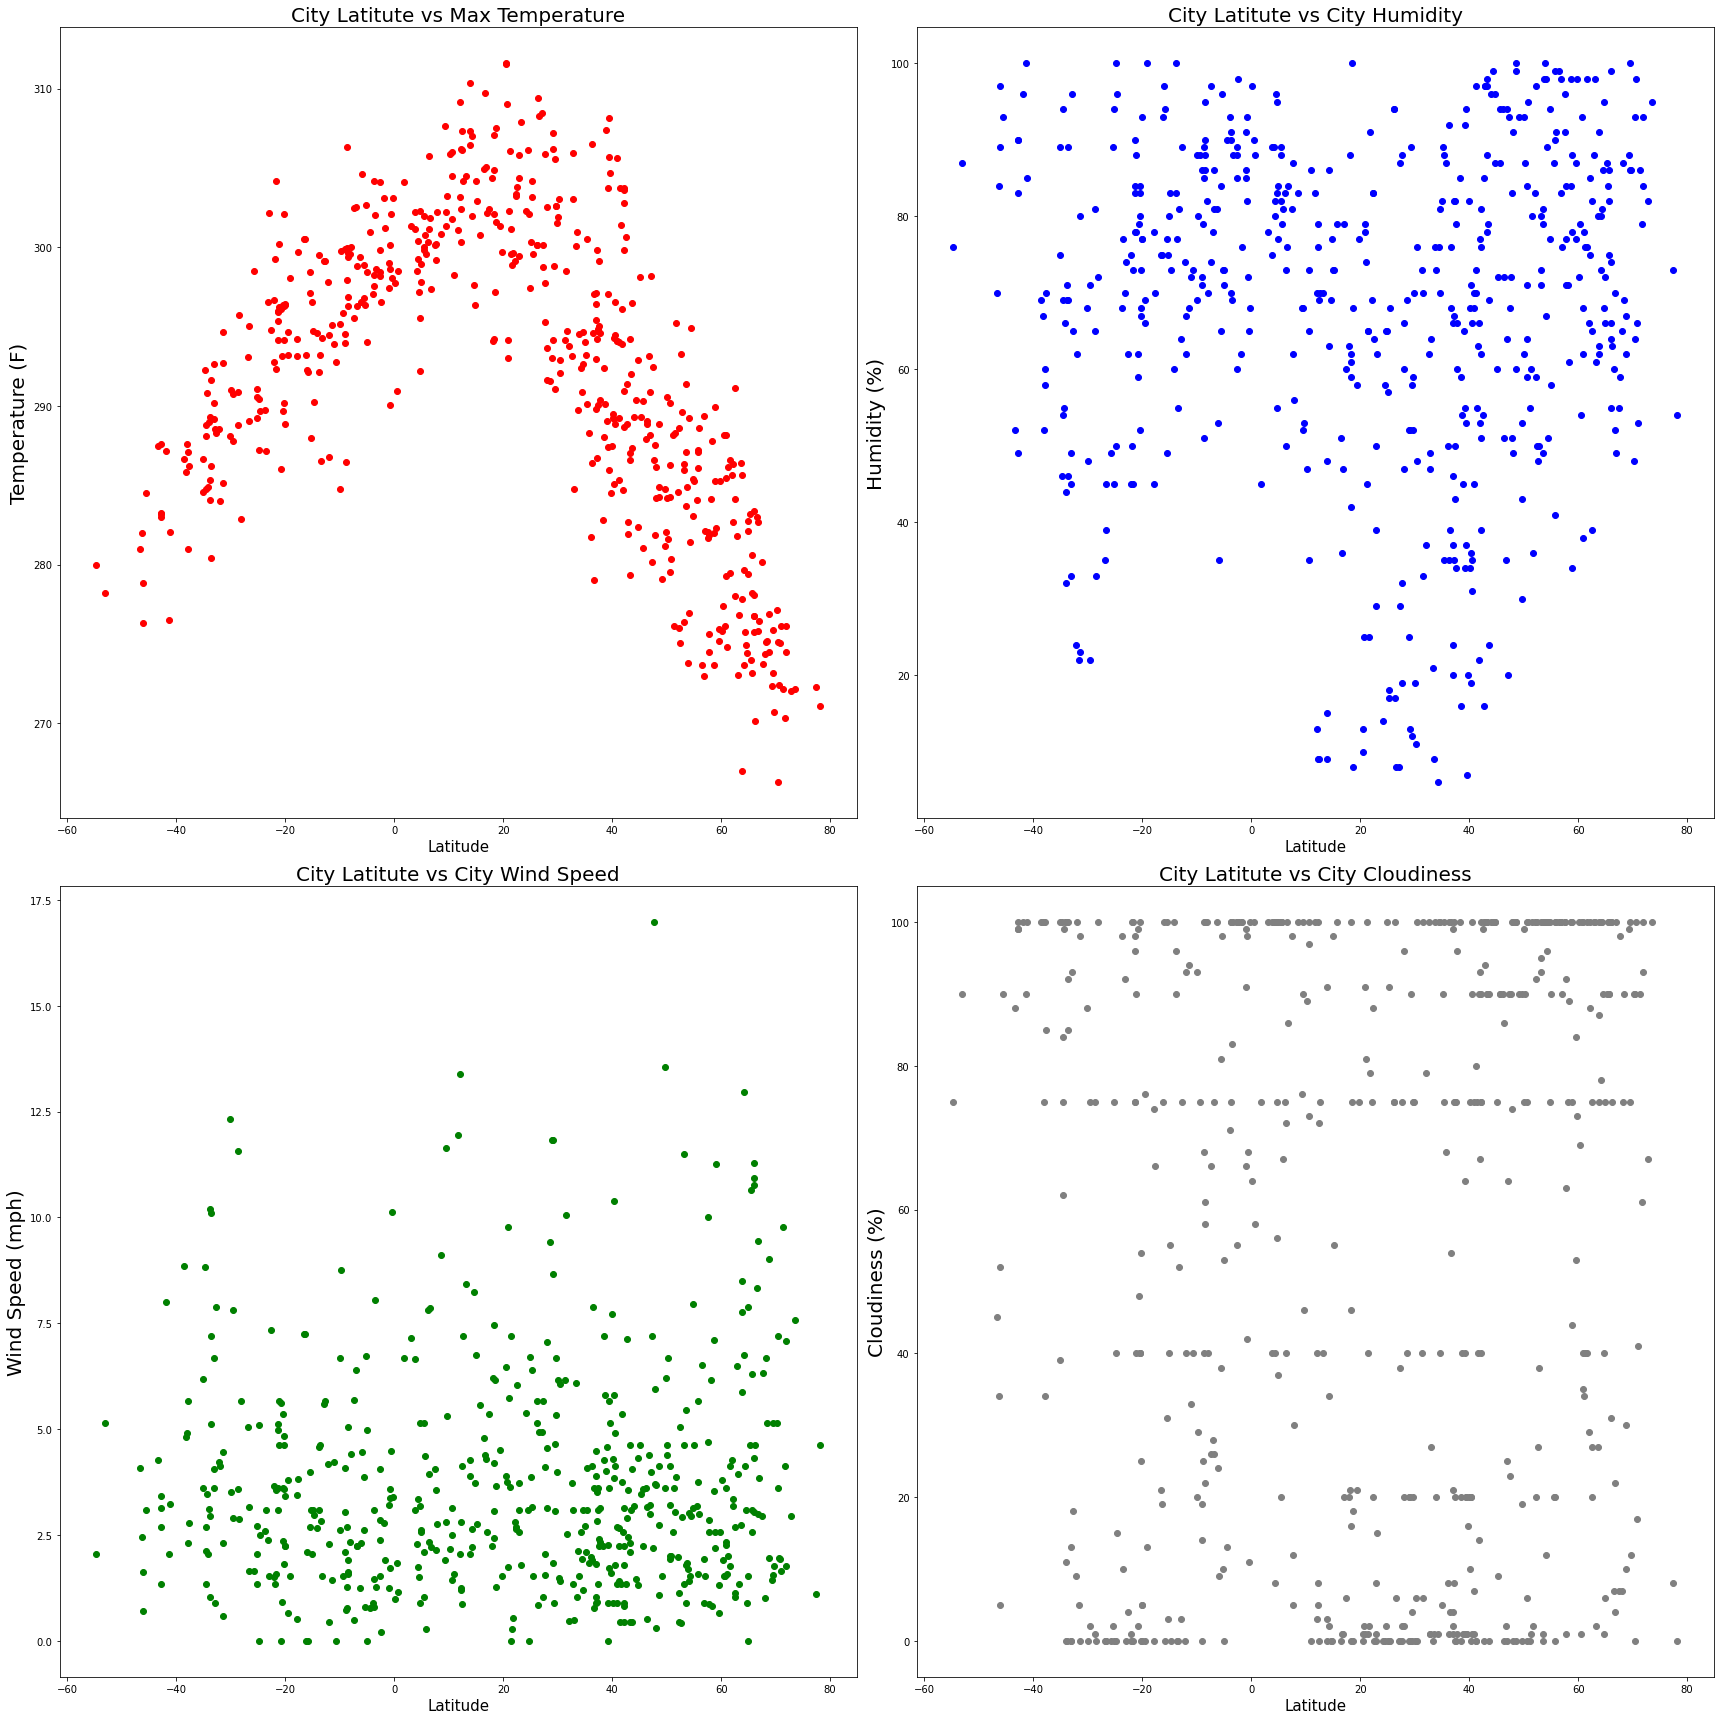

In [7]:
# A figure of (1x2) 
fig, axis =plt.subplots(2,2,figsize=(24,24))

axis[0,0].scatter(cities_df["Lat"],cities_df["Max Temp"], color="red")
axis[0,0].set_ylabel("Temperature (F)",fontsize=20)
axis[0,0].set_xlabel("Latitude",fontsize=15)
axis[0,0].set_title("City Latitute vs Max Temperature", fontsize=20)

axis[0,1].scatter(cities_df["Lat"],cities_df["Humidity"], color="blue")
axis[0,1].set_ylabel("Humidity (%)",fontsize=20)
axis[0,1].set_xlabel("Latitude",fontsize=15)
axis[0,1].set_title("City Latitute vs City Humidity",fontsize=20)

axis[1,1].scatter(cities_df["Lat"],cities_df["Cloudiness"], color="gray")
axis[1,1].set_ylabel("Cloudiness (%)",fontsize=20)
axis[1,1].set_xlabel("Latitude",fontsize=15)
axis[1,1].set_title("City Latitute vs City Cloudiness",fontsize=20)

axis[1,0].scatter(cities_df["Lat"],cities_df["Wind Speed"], color="green")
axis[1,0].set_ylabel("Wind Speed (mph)",fontsize=20)
axis[1,0].set_xlabel("Latitude",fontsize=15)
axis[1,0].set_title("City Latitute vs City Wind Speed",fontsize=20)

# Saving to png
filename = 'cities_plots.png'
path = os.path.join('Images', filename)
plt.savefig(path)


# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

* Temperatures are lower when the cities are farther from the equator.
* There is no clear correlation between the cities location, relative to the equator, and its humidity  level.
* In general, no matter the cities location relative to the equator, most of them have a wind speed of less than 7.5 mph.
* There is no clear correlation between the cities location, relative to the equator, and its cloudiness.

#  Linear Regression Anlaysis differentiating by Hemisphere

In [8]:
#Define hemispheres
north_df = cities_df.loc[cities_df['Lat'] >= 0] # Northern Hemisphere (greater than or equal to 0 degrees latitude)
south_df = cities_df.loc[cities_df['Lat'] < 0] # Southern Hemisphere (less than 0 degrees latitude)

## Northern and Souther Hemisphere  - Max Temp vs. Latitude Linear Regression

The Northern r-squared is: 0.6933024997283627
The Southern r-squared is: 0.6271286199794712


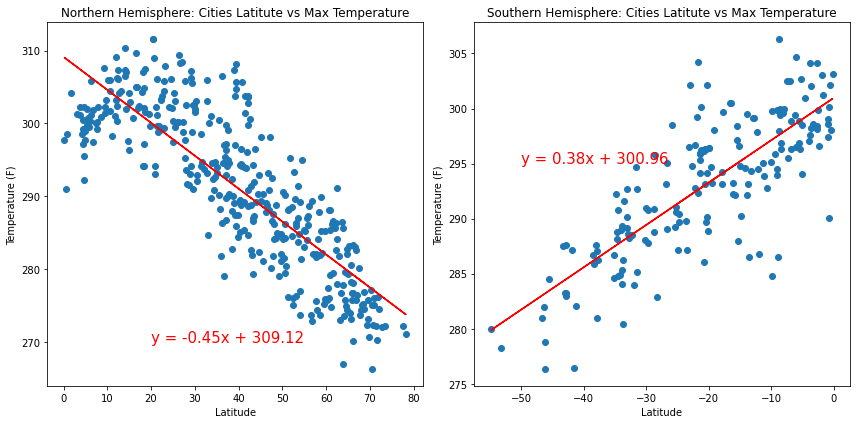

In [9]:
# Defining northern y and x values
x_values = north_df['Lat']
y_values = north_df['Max Temp']

# Defining the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# A figure of (1x2) 
fig, axis =plt.subplots(1,2,figsize=(12,6))


# Plotting the northern graph in the position (0,0) in the figure 
axis[0].scatter(x_values,y_values)
axis[0].plot(x_values,regress_values,"r-")
axis[0].annotate(line_eq,(20,270),fontsize=15,color="red")
axis[0].set_xlabel('Latitude')
axis[0].set_ylabel('Temperature (F)')
axis[0].set_title("Northern Hemisphere: Cities Latitute vs Max Temperature")
print(f"The Northern r-squared is: {rvalue**2}")


# Defining southern y and x values
x_values = south_df['Lat']
y_values = south_df['Max Temp']

# Defining the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the southern graph in the position (0,1) in the figure 
axis[1].scatter(x_values,y_values)
axis[1].plot(x_values,regress_values,"r-")
axis[1].annotate(line_eq,(-50,295),fontsize=15,color="red")
axis[1].set_xlabel('Latitude')
axis[1].set_ylabel('Temperature (F)')
axis[1].set_title("Southern Hemisphere: Cities Latitute vs Max Temperature")
print(f"The Southern r-squared is: {rvalue**2}")


# Saving to png
filename = 'hemispheres_temp_lat.png'
path = os.path.join('Images', filename)
plt.savefig(path)


# Packing all the plots and displaying them
plt.tight_layout()
plt.show()



* There is a clear negative correlation between the latitude of cities in the northern hemisphere and the maximum temperature. When the cities are farther from the equator the temperatures are lower. In the same way, for cities in the southern hemisphere, when the cities are farther from the equator temperatures are lower.

* Adittionaly, from the linear regression analysis, we get that in the northern hemisphere cities the latitute explains 70% of the variation of the maximun temperatures; while in the southern hemisphere cities the latitute explains the 62% of the temperature variation.  

## Northern and Souther Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Northern r-squared is: 0.03707253878751975
The Southern r-squared is: 0.04947336403113408


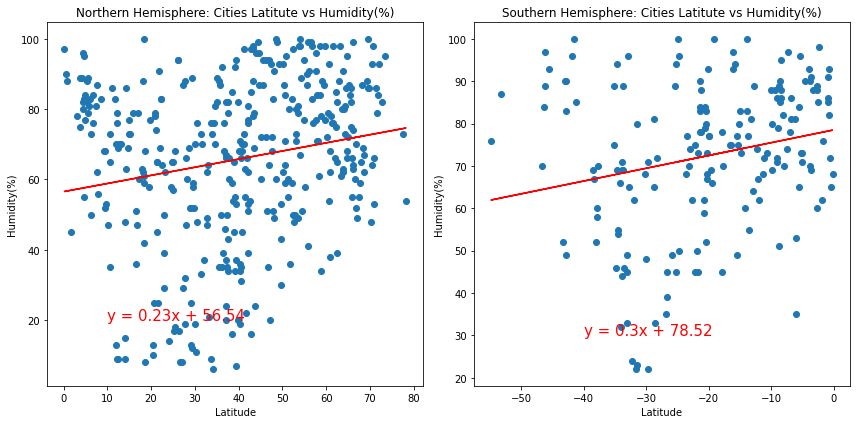

In [10]:
# Defining northern y and x values
x_values = north_df['Lat']
y_values = north_df['Humidity']

# Defining the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# A figure of (1x2) 
fig, axis =plt.subplots(1,2,figsize=(12,6))

# Plotting the southern graph in the position (0,1) in the figure 
axis[0].scatter(x_values,y_values)
axis[0].plot(x_values,regress_values,"r-")
axis[0].annotate(line_eq,(10,20),fontsize=15,color="red")
axis[0].set_xlabel('Latitude')
axis[0].set_ylabel('Humidity(%)')
axis[0].set_title("Northern Hemisphere: Cities Latitute vs Humidity(%)")
print(f"The Northern r-squared is: {rvalue**2}")


# Defining southern y and x values
x_values = south_df['Lat']
y_values = south_df['Humidity']

# Defining the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the southern graph in the position (0,1) in the figure
axis[1].scatter(x_values,y_values)
axis[1].plot(x_values,regress_values,"r-")
axis[1].annotate(line_eq,(-40,30),fontsize=15,color="red")
axis[1].set_xlabel('Latitude')
axis[1].set_ylabel('Humidity(%)')
axis[1].set_title("Southern Hemisphere: Cities Latitute vs Humidity(%)")
print(f"The Southern r-squared is: {rvalue**2}")

# Saving to png
filename = 'hemispheres_hum_lat.png'
path = os.path.join('Images', filename)
plt.savefig(path)


# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

* There is a weak positive correlation between the latitude of cities in the northern hemisphere and the humidity level. When the cities are farther from the equator the humidity level is higher. On the contrary, for cities in the southern hemisphere, when the cities are closer to the equator humidity levels are higher.

* From the linear regression analysis, for both northern and southern hemispheres, the latitude explains less than 5% of the variation in the cities humidity level.  

## Northern and Souther Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Northern r-squared is: 0.023015138262765977
The Southern r-squared is: 0.0004876915676674577


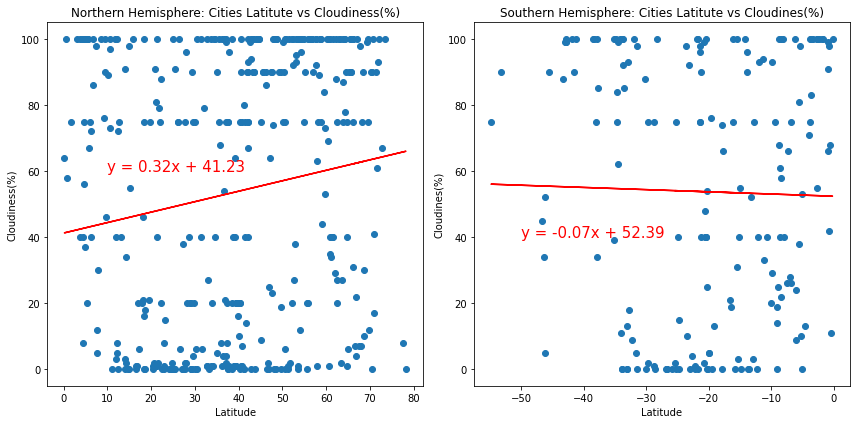

In [11]:
# Defining northern y and x values
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# Defining the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# A figure of (1x2) 
fig, axis =plt.subplots(1,2,figsize=(12,6))

# Plotting the southern graph in the position (0,1) in the figure 
axis[0].scatter(x_values,y_values)
axis[0].plot(x_values,regress_values,"r-")
axis[0].annotate(line_eq,(10,60),fontsize=15,color="red")
axis[0].set_xlabel('Latitude')
axis[0].set_ylabel('Cloudiness(%)')
axis[0].set_title("Northern Hemisphere: Cities Latitute vs Cloudiness(%)")
print(f"The Northern r-squared is: {rvalue**2}")

# Defining southern y and x values
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# Defining the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the southern graph in the position (0,1) in the figure
axis[1].scatter(x_values,y_values)
axis[1].plot(x_values,regress_values,"r-")
axis[1].annotate(line_eq,(-50,40),fontsize=15,color="red")
axis[1].set_xlabel('Latitude')
axis[1].set_ylabel('Cloudines(%)')
axis[1].set_title("Southern Hemisphere: Cities Latitute vs Cloudines(%)")
print(f"The Southern r-squared is: {rvalue**2}")


# Saving to png
filename = 'hemispheres_cloud_lat.png'
path = os.path.join('Images', filename)
plt.savefig(path)


# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

* There is a weak positive correlation between the latitude of cities in the northern hemisphere and the cloudiness level. When the cities are farther from the equator the cloudiness level is higher. On the contrary, for cities in the southern hemisphere, when the cities are closer to the equator cloudiness levels are lower.

* From the linear regression analysis, for both northern and southern hemispheres, the latitude explains less than 5% of the variation in the cities cloudiness level.

## Northern and Souther Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Northern r-squared is: 0.0008878343795834245
The Southern r-squared is: 0.030520439965513436


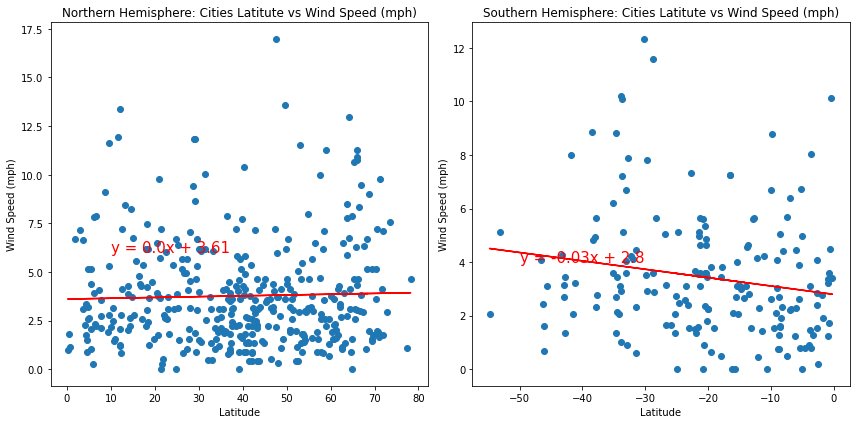

In [12]:
# Defining northern y and x values
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

# Defining the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# A figure of (1x2) 
fig, axis =plt.subplots(1,2,figsize=(12,6))

# Plotting the southern graph in the position (0,1) in the figure 
axis[0].scatter(x_values,y_values)
axis[0].plot(x_values,regress_values,"r-")
axis[0].annotate(line_eq,(10,6),fontsize=15,color="red")
axis[0].set_xlabel('Latitude')
axis[0].set_ylabel('Wind Speed (mph)')
axis[0].set_title("Northern Hemisphere: Cities Latitute vs Wind Speed (mph)")
print(f"The Northern r-squared is: {rvalue**2}")

# Defining southern y and x values
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

# Defining the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the southern graph in the position (0,1) in the figure
axis[1].scatter(x_values,y_values)
axis[1].plot(x_values,regress_values,"r-")
axis[1].annotate(line_eq,(-50,4),fontsize=15,color="red")
axis[1].set_xlabel('Latitude')
axis[1].set_ylabel('Wind Speed (mph)')
axis[1].set_title("Southern Hemisphere: Cities Latitute vs Wind Speed (mph)")
print(f"The Southern r-squared is: {rvalue**2}")


# Saving to png
filename = 'hemispheres_wind_lat.png'
path = os.path.join('Images', filename)
plt.savefig(path)


# Packing all the plots and displaying them
plt.tight_layout()
plt.show()




* There is a weak positive correlation between the latitude of cities in the northern hemisphere and the wind speed. When the cities are farther from the equator the humidity level is higher. On the contrary, for cities in the southern hemisphere, when the cities are closer to the equator wind speed is lower.

* From the linear regression analysis, for both northern and southern hemispheres, the latitude explains less than 5% of the variation in the cities wind speed.